# Start Here

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pylab as plt

import sys
sys.path.append('../../tidy3d')

import tidy3d as td
import tidy3d.web as web

In [6]:
# set up parameters of simulation
dl=0.01
pml = td.PML(num_layers=10)
sim_size = [4, 4, 4]
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 10.0 / fwidth

# create structure
dielectric = td.Medium.from_nk(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=[0, 0, 0], size=[1.5, 1.5, 1.5]),
    medium=dielectric)

# create source
source = td.VolumeSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=fwidth),
    polarization='Ey')

# create monitor
monitor = td.FieldMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=(0, 0, 0),
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name='field')

# Initialize simulation
sim = td.Simulation(size=sim_size,
                    grid_size=(dl, dl, dl),
                    structures=[square],
                    sources=[source],
                    monitors=[monitor],
                    run_time=run_time,
                    pml_layers=(pml, pml, pml))

In [7]:
data = web.run(sim, task_name='quickstart', path='data/data.hdf5')

[13:30:17] INFO     Uploaded task 'quickstart' with task_id                      ]8;id=713794;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:84
                    '03b11bc3-b19a-44ba-88a4-d5e68fd6f67f'.

Output()

[13:30:19] status = queued                                                      ]8;id=223379;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:30:30] status = preprocess                                                  ]8;id=70713;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:30:55] status = running                                                     ]8;id=529836;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:31:56] status = postprocess                                                 ]8;id=443797;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

           status = visualize                                                   ]8;id=324031;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:32:00] status = success                                                     ]8;id=416771;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:176

[13:32:01] INFO     downloading file "simulation.json" to                       ]8;id=753129;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393
                    "data/simulation.json"

Output()

           INFO     downloading file "monitor_data.hdf5" to                     ]8;id=216058;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393
                    "data/monitor_data.hdf5"

Output()

[13:32:02] INFO     downloading file "tidy3d.log" to "data/tidy3d.log"          ]8;id=823855;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:393

Output()

           INFO     exporting SimulationData to data/data.hdf5                  ]8;id=163749;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:266

           INFO     loading SimulationData from data/data.hdf5                  ]8;id=910110;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:302

In [8]:
print(data.log)

Simulation domain Nx, Ny, Nz: [420, 420, 420]
Applied symmetries: [0, 0, 0]
Number of computational grid points: 7.4088e+07.
Using subpixel averaging: True
Number of time steps: 19246
Automatic shutoff factor: 1.00e-05
Time step (s): 1.7332e-17

Get source modes time (s):    0.1180
Get monitor modes time (s):   0.0363
Rest of setup time (s):       0.0848

Starting solver...
- Time step    769 / time 1.33e-14s (  4 % done), field decay: 1.00e+00
- Time step   1531 / time 2.65e-14s (  7 % done), field decay: 1.00e+00
- Time step   1539 / time 2.67e-14s (  8 % done), field decay: 9.40e-01
- Time step   2309 / time 4.00e-14s ( 12 % done), field decay: 3.71e-01
- Time step   3079 / time 5.34e-14s ( 16 % done), field decay: 9.76e-02
- Time step   3849 / time 6.67e-14s ( 20 % done), field decay: 4.00e-02
- Time step   4619 / time 8.01e-14s ( 24 % done), field decay: 1.94e-02
- Time step   5388 / time 9.34e-14s ( 28 % done), field decay: 1.59e-02
- Time step   6158 / time 1.07e-13s ( 32 % done

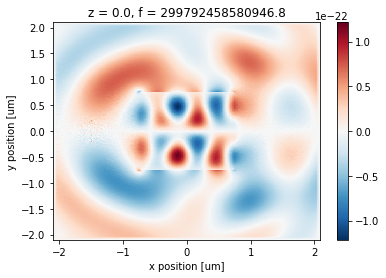

In [13]:
ax = data['field'].Ey.real.plot(x='x', y='y')